## Portfolio Part 3

In this Portfolio task you will continue working with the movielens data collected by the GroupLens Research Project at the University of Minnesota. The columns in the dataset are a little bit different from the ones provided in the previous Portfolio tasks, where the 'rating' column is replaced by the 'feedback' column. There are two values regarding the 'feedback' with 1 indicating the user likes the corresponding movie; otherwise 0. 

The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | feedback | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __feedback__ - the user's feedback towards the movie (1 means 'like'; 0 means 'dislike')
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may like multiple movies and a same movie (i.e., a same movieId) may be preferred by multiple users.


Your high level goal in this notebook is to try to build and evaluate predictive models for feedback from available features - predict the value of the __feedback__ field in the data from some of the other fields. Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.

Note: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use a ___simple Logistic Regression model___ and ___one of the more advanced methods___ covered in recent weeks. Accordingly, discuss the performance of the simple and advanced methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
movielens = pd.read_csv('files/movielens_data_feedback.csv')

# drop timestamp column as it is not used for this analysis
movielens = movielens.drop(['timestamp'], axis=1)
movielens.head(10)

,userId,age,gender,occupation,movieId,feedback,genre
0,196,49,M,writer,242,0,Comedy
1,186,39,F,executive,302,0,Crime
2,22,25,M,writer,377,0,Children
3,244,28,M,technician,51,0,Romance
4,166,47,M,educator,346,0,Drama
5,298,44,M,executive,474,1,War
6,115,31,M,engineer,265,0,Action
7,253,26,F,librarian,465,1,Adventure
8,305,23,M,programmer,451,0,Romance
9,6,42,M,executive,86,0,Drama


In [3]:
# data type of each column
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userId      100000 non-null  int64 
 1   age         100000 non-null  int64 
 2   gender      100000 non-null  object
 3   occupation  100000 non-null  object
 4   movieId     100000 non-null  int64 
 5   feedback    100000 non-null  int64 
 6   genre       100000 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.3+ MB


In [4]:
# convert categorical values into numerical values
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int64)
movielens[['gender','occupation', 'genre']] = enc.fit_transform(movielens[['gender','occupation', 'genre']])
movielens.head(10)

,userId,age,gender,occupation,movieId,feedback,genre
0,196,49,1,20,242,0,4
1,186,39,0,6,302,0,5
2,22,25,1,20,377,0,3
3,244,28,1,19,51,0,13
4,166,47,1,3,346,0,7
5,298,44,1,6,474,1,16
6,115,31,1,4,265,0,0
7,253,26,0,10,465,1,1
8,305,23,1,14,451,0,13
9,6,42,1,6,86,0,7


In [5]:
# data type of each column after OrdinalEncoder feature
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   userId      100000 non-null  int64
 1   age         100000 non-null  int64
 2   gender      100000 non-null  int64
 3   occupation  100000 non-null  int64
 4   movieId     100000 non-null  int64
 5   feedback    100000 non-null  int64
 6   genre       100000 non-null  int64
dtypes: int64(7)
memory usage: 5.3 MB


No. of samples who does not like the movie: 44625
No. of samples who likes the movie: 55375


<AxesSubplot:xlabel='feedback', ylabel='count'>

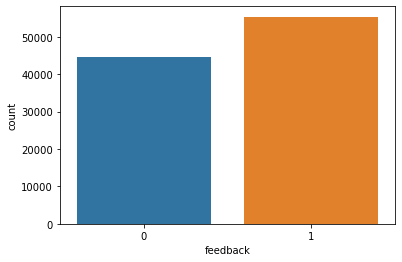

In [6]:
# Check number of samples for each class and find out whether dataset is balance
print('No. of samples who does not like the movie:', movielens[movielens['feedback']==0].shape[0])
print('No. of samples who likes the movie:', movielens[movielens['feedback']==1].shape[0])

sns.countplot(x=movielens['feedback'], label=['Count'])

In [7]:
# check if there is any null or NaN data before splitting
movielens.isna().sum()

userId        0
age           0
gender        0
occupation    0
movieId       0
feedback      0
genre         0
dtype: int64

## Splitting Data and Feature Selection

In [8]:
# Splitting data with 80% train size and 20% test size

from sklearn.model_selection import train_test_split

movielens_train, movielens_test = train_test_split(movielens, test_size=0.2, random_state=142)

In [9]:
# setting X (independant variables) and y (dependant variable)
X_train = movielens_train.drop(['userId', 'movieId', 'feedback'], axis=1)
y_train = movielens_train['feedback']

X_test = movielens_test.drop(['userId', 'movieId', 'feedback'], axis=1)
y_test = movielens_test['feedback']

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape: (80000, 4)
y_train shape: (80000,)
X_test shape:  (20000, 4)
y_test shape:  (20000,)


## Simple Logistic Regression Model

In [10]:
# create logistic Regression Model
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

LogisticRegression()

In [11]:
# predict the model
Predict = Logreg.predict(X_test)
print(Predict)

[1 1 1 ... 1 1 1]


## Evaluation of Logisitic Regression Model

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

print('Accuracy scores on testing set:', accuracy_score(y_test, Predict))

Accuracy scores on testing set: 0.55755


Confusion Matrix on test set
[[  228  8616]
 [  233 10923]]


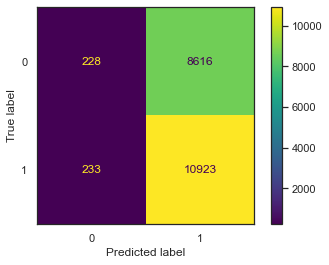

In [13]:
# visualize the logistic regression outcome using Confusion Matrix
print('Confusion Matrix on test set')
print(confusion_matrix(y_test, Predict))

sns.set(style='white')
plot_confusion_matrix(Logreg, X_test, y_test)

According to the accuracy score, the model used in here able to produce 56% accuracy when predicting the test dataset. It was also illustrated in Confusion Matrix Plot, where there was 228 correct prediction for '0' feedback and 10923 correct prediction for '1' feedback. However, this model had the tendency to predict '1' feedback from the test data, which could be seen that there were 8616 false prediction for '1' feedback. It may cause a bias due to unbalanced distribution for the prediction outcome.

## Using RFE to Select Features

In [14]:
from sklearn.feature_selection import RFE

#create RFE project
Logreg = LogisticRegression()
# build the model using RFE to select the best feature
rfe = RFE(estimator=Logreg, n_features_to_select=4, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=4)

In [15]:
# Ranking the the best feature according to RFE
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
    
X_train

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000


,age,gender,occupation,genre
36772,51,1,6,4
43891,46,1,2,7
52044,29,1,13,4
14810,60,1,15,12
64521,37,0,11,13
...,...,...,...,...
5146,48,1,3,15
40204,21,1,20,15
78335,28,1,14,0
31131,50,0,20,9


This indicates that all features more or less provide the same machine learning model quality to predict the 'feedback', according to the RFE.

In [16]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,5):
    Logreg = LogisticRegression()
    rfe = RFE(estimator=Logreg, n_features_to_select=i)
    
    # training model
    rfe.fit(X_train, y_train)
    
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    # show results
    print('Acc on test set using', i, 'features: ', acc_score)
    
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.5578
Acc on test set using 2 features:  0.55665
Acc on test set using 3 features:  0.55755
Acc on test set using 4 features:  0.55755


According to accuracy score when using RFE, the best feature to be used was 1 feature So, we try to run RFE with one (1) feature to be selected instead. 

In [17]:
# predict the 'feedback' using three (3) features selected by RFE
rfe = RFE(estimator=Logreg, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
feedback_predict = rfe.predict(X_test)

feedback_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Confusion Matrix on test set using RFE
[[    0  8844]
 [    0 11156]]


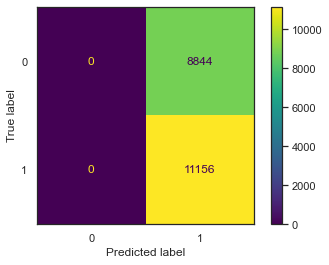

In [18]:
# visualize the regression outcome using Confusion Matrix
print('Confusion Matrix on test set using RFE')
print(confusion_matrix(y_test, feedback_predict))

sns.set(style='white')
plot_confusion_matrix(rfe, X_test, y_test)

In the confusion matrix with one (1) feature selected by RFE, we could see that the model predicted that all of the of outcomes should be '1', which was the 'like' feedback from the respondents. This indicated that even using the RFE, the model tend to predict that most of the outcomes should be '1', which still may cause bias due to unbalanced prediction distribution outcomes. However, since the accuracy score was not significantly different from the above logistic regression, we could see almost the same amount of false prediction. There was an increase of false prediction of '1' from 8616 to 8844 outcomes. 

## K-Nearest Neighbor (KNN) Model

We will try to run a machine learning model using KNN to find out if it could provide a better outcome from simple Logistic Regression. We use the data splitted for train and test data from above.

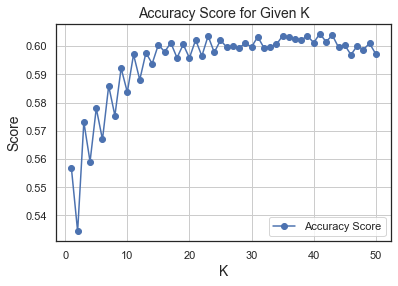

In [19]:
# import K-Nearest Neighbor Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# try run k=1 up to 50 and record testing accuracy
k_range = range(1,51)
scores = {}
scores_list = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    scores[i] = accuracy_score(y_test, knn_pred)
    scores_list.append(accuracy_score(y_test, knn_pred))
    
# Plot the accuracy score for given i
plt.plot(range(1, 51), scores_list, marker='o', label='Accuracy Score')
plt.xlabel('K', fontsize=14)
plt.ylabel('Score', fontsize =14)
plt.legend(loc='best')
plt.title('Accuracy Score for Given K', fontsize=14)
plt.grid(True)
plt.show()

As seen in the line plot, it was believed that K=41 may provide the best accuracy score among other 'K' options. However, we will try to esimate the accuracy if the test data set had different scenarios, using K-fold Cross Validation Score.

In [20]:
from sklearn.model_selection import cross_val_score
X = movielens.drop(['userId', 'movieId', 'feedback'], axis=1)
y = movielens['feedback']

# Create a KNN classifier model and use k-fold cross validation for testing accuracy estimation
knn2 = KNeighborsClassifier(n_neighbors = 41)
scores = cross_val_score(knn2, X, y, cv=5)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.59455 0.5974  0.6036  0.5947  0.5855 ]
Average accuracy: 0.5952 +- 0.0058


According to 5-fold Cross Validation Score, the accuracy of K=41 was around 59% to 60%. This score was already better than the simple logistic regression accuracy score above. Hence, using K-Nearest Neighbour proven to increase the machine learning quality. However, we will try to find out which 'k' is the best using Algorithm Parameter tuning in order to fine tune KNN machine learning algorithm. 

In [21]:
from sklearn.model_selection import GridSearchCV

# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 51)}

# Create the machine learning model
knn3 = KNeighborsClassifier()
AP_tuning = GridSearchCV(knn3, parameter_grid, scoring='accuracy')
AP_tuning.fit(X, y)

# Identify the best parameter(s)
print('Best K value: ', AP_tuning.best_params_['n_neighbors'])
print('The accuracy: ', AP_tuning.best_score_)

Best K value:  21
The accuracy:  0.5965


According to Algorithm Parameter Tuning, the best K value to be used was 21 instead. This will be used for our final model using KNN machine learning. 

In [22]:
# Create and training a KNN classifier model with the best K decided by Algorithm Parameter tuning
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)

# Use the model above to predict testing data
knn_pred = knn.predict(X_test)
accuracy = accuracy_score(knn_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.60215


Confusion Matrix on test set using KNN
[[4121 4723]
 [3234 7922]]


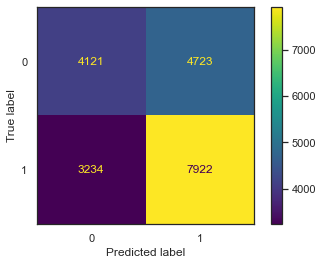

In [23]:
# visualize the KNN Machine Learning Output using Confusion Matrix
print('Confusion Matrix on test set using KNN')
print(confusion_matrix(y_test, knn_pred))

sns.set(style='white')
plot_confusion_matrix(knn, X_test, y_test)

Overall, by using KNN as the machine learning, we were able to increase the model's accuracy compared with simple Logistic Regression machine learning. This was due to KNN's nature which predict outcomes using neighbouring data that is within the range of the denoted 'K'. Suppose the neighbouring data have certain similar characteristics with one test data, it is able to predict that test data will return the same outcome with the neighbouring data. This was quite opposite with Logistic Regression, as the model was really dependant on the quality of independant variables. Poor data quality of independent variables lead to poor regression model. 

The improvement also visualized in the Confusion Matrix when using KNN. In the Logistic Regression model, we saw that the model tend to predict '1' as the outcome of the test data, which was quite unbalanced distribution for the outcome. However, the KNN model had a better distribution for the prediction outcome. In KNN model, it predicted 7355 '0' outcomes and 12645 '1' outcomes for feedbacks, compared with only up to 461 predicted '0' outcomes for feedbacks using logistic regression model. It also reflected the distribution of the 'feedback' data before it was splitted. 